**Отображение векторизованного корпуса с уменьшением размерности**

In [1]:
from Lensky.lensky import *
import pandas as pd

Загрузка корпуса по адресу

In [2]:
corp = Corpus('data\corpus_ru_normalized')

Loading...


100%|████████████████████████████████████████████████████████████████████████████████| 180/180 [00:03<00:00, 54.13it/s]

Done!


In [3]:
corp.get([0, 0])

"спасибо скачать книга бесплатный электронный библиотека royallib.com http //royallib.com книга автор http //royallib.com/author/avdeev_mihail.html книга другой формат http //royallib.com/book/avdeev_mihail/varenka.html приятный чтение м. в. авдеев тамарин предисловие автор настоящий роман напечатать отдельный повесть современник 1849 1850 1851 год раздробление иметь свой неудобство общий идея роман развитие изменение характер представляться часть вполне ясный производить цельный впечатление издавать ныне роман вполне считать нужный сказать несколько слово цель задумать мой взгляд исполнение автор разбор сочинение пушкин отечественный записка заметить онегин печорин составлять тип характер печорин характер онегин измениться последовательный развитие замечание мой мнение весьма справедливый дать мысль проследить дальнейший развитие тип герой свой время иметь наш свой представитель цель задумать тамарин характер породить разнородный толк требовать объяснение поэтому обращаться первообраз

Небольшая уловка, чтобы воспользоваться встроенной в Lensky функцией. Разобьем предварительно нормализованные загруженные тексты на отдельные слова, превратив их в списки

In [4]:
def to_list(book):
    return book.split()

In [5]:
corp.apply(to_list, replace=True)

Processing...


100%|████████████████████████████████████████████████████████████████████████████████| 180/180 [00:01<00:00, 92.25it/s]

Done!


In [6]:
corp.get([0, 0])

['спасибо',
 'скачать',
 'книга',
 'бесплатный',
 'электронный',
 'библиотека',
 'royallib.com',
 'http',
 '//royallib.com',
 'книга',
 'автор',
 'http',
 '//royallib.com/author/avdeev_mihail.html',
 'книга',
 'другой',
 'формат',
 'http',
 '//royallib.com/book/avdeev_mihail/varenka.html',
 'приятный',
 'чтение',
 'м.',
 'в.',
 'авдеев',
 'тамарин',
 'предисловие',
 'автор',
 'настоящий',
 'роман',
 'напечатать',
 'отдельный',
 'повесть',
 'современник',
 '1849',
 '1850',
 '1851',
 'год',
 'раздробление',
 'иметь',
 'свой',
 'неудобство',
 'общий',
 'идея',
 'роман',
 'развитие',
 'изменение',
 'характер',
 'представляться',
 'часть',
 'вполне',
 'ясный',
 'производить',
 'цельный',
 'впечатление',
 'издавать',
 'ныне',
 'роман',
 'вполне',
 'считать',
 'нужный',
 'сказать',
 'несколько',
 'слово',
 'цель',
 'задумать',
 'мой',
 'взгляд',
 'исполнение',
 'автор',
 'разбор',
 'сочинение',
 'пушкин',
 'отечественный',
 'записка',
 'заметить',
 'онегин',
 'печорин',
 'составлять',
 'тип',

# Проведем векторизацию методом TF-IDF

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(smooth_idf=False)

In [99]:
np.where(tfidf.get_feature_names_out()=='свой')[0][0]

284458

In [97]:
tfidf.transform(['свой']).A[0][284458]

1.0

In [92]:
author_tfidf = corp.vectorize(tfidf)

Vectorizer fitting...
Done!
Vectorizing...


100%|████████████████████████████████████████████████████████████████████████████████| 180/180 [02:36<00:00,  1.15it/s]

Done!


Создадим новый Lenky Corpus, где ключами будут века, а не авторы

In [9]:
def cent(year):
    if year < 1801:
        return 18
    if year >= 1801 and year < 1901:
        return 19
    if year >= 1901 and year < 2001:
        return 20
    if year >= 2001:
        return 21

In [10]:
cent_tfidf = Corpus(corpus={18 : {}, 19 : {}, 20 : {}, 21 : {}})
for key in corp.keys():
    for subkey in author_tfidf[key].keys():
        year = int(subkey.split('.')[-1])
        cent_tfidf[cent(year)][subkey] = author_tfidf[key][subkey]

Будем использовать отображение UMAP

In [11]:
import umap

mapper = umap.UMAP()
model_fit(cent_tfidf, mapper)

Loading data...


100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]

Done!
Model fitting...


Done!


Corpus processing...


100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]
4it [00:00, 400.00it/s]

Done!


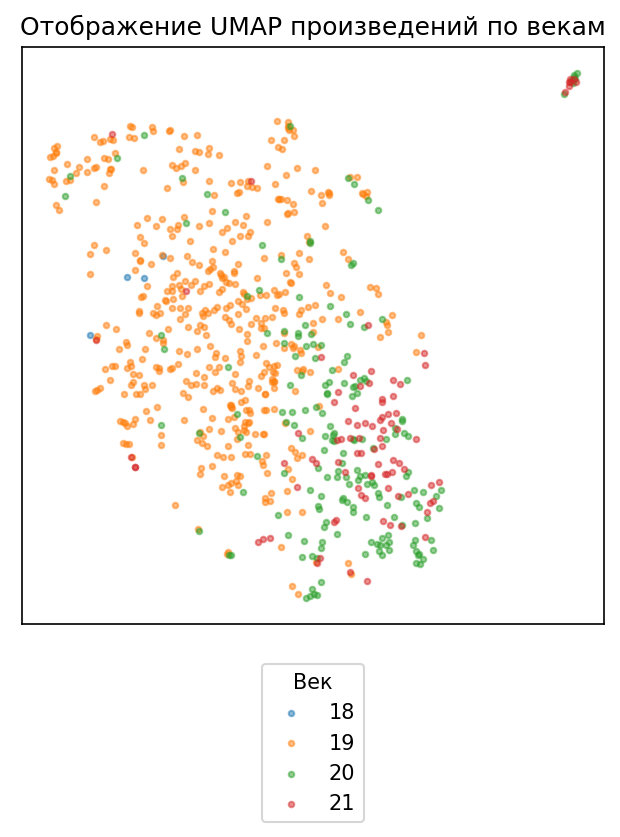

In [12]:
plot_by_keys(cent_tfidf, mapper, figsize=(5, 5), dpi=150, title='Отображение UMAP произведений по векам', legend_title='Век')

In [18]:
plot_interactive(cent_tfidf, mapper)

Corpus processing...


100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


In [58]:
vec1819 = list(cent_tfidf[18].values()) + list(cent_tfidf[19].values())
vec2021 = list(cent_tfidf[20].values()) + list(cent_tfidf[21].values())

In [72]:
vec1819_mean = vmean(vec1819)
vec1819_mean.get_principal_words()[:100]

array(['свой', 'сказать', 'говорить', 'то', 'который', 'человек', 'знать',
       'мой', 'один', 'рука', 'мочь', 'дело', 'время', 'глаз', 'стать',
       'хотеть', 'день', 'ты', 'очень', 'слово', 'какой', 'видеть',
       'лицо', 'другой', 'голова', 'сам', 'князь', 'дом', 'думать', 'год',
       'такой', 'жизнь', 'наш', 'тот', 'ваш', 'весь', 'иванович',
       'отвечать', 'друг', 'быть', 'бог', 'казаться', 'отец', 'спросить',
       'первый', 'любить', 'несколько', 'идти', 'самый', 'молодой',
       'должный', 'дать', 'сердце', 'место', 'душа', 'комната', 'жить',
       'смотреть', 'голос', 'сделать', 'минута', 'мы', 'иметь', 'взять',
       'делать', 'пойти', 'нибудь', 'иван', 'этот', 'мать', 'сторона',
       'выйти', 'женщина', 'сидеть', 'твой', 'петрович', 'новый', 'кто',
       'стоять', 'ребёнок', 'хороший', 'брат', 'любовь', 'дверь', 'мысль',
       'два', 'деньга', 'всякий', 'жена', 'продолжать', 'последний',
       'господин', 'граф', 'начать', 'час', 'заметить', 'нога', 'стар

In [60]:
vec2021_mean = vmean(vec2021)
vec2021_mean.get_principal_words()[:100]

array(['сказать', 'свой', 'то', 'человек', 'рука', 'который', 'знать',
       'один', 'говорить', 'мочь', 'стать', 'время', 'глаз', 'год', 'мой',
       'день', 'дело', 'голова', 'лицо', 'жизнь', 'хотеть', 'наш', 'сам',
       'идти', 'какой', 'видеть', 'очень', 'тот', 'другой', 'первый',
       'ты', 'слово', 'дом', 'такой', 'думать', 'друг', 'спросить',
       'быть', 'весь', 'фандорин', 'место', 'самый', 'нога', 'казаться',
       'смотреть', 'мы', 'жить', 'несколько', 'сидеть', 'дверь', 'новый',
       'просто', 'должный', 'стоять', 'сторона', 'понять', 'голос', 'два',
       'кто', 'эраст', 'сделать', 'взять', 'земля', 'пойти', 'ответить',
       'делать', 'сразу', 'дать', 'выйти', 'по', 'чёрный', 'увидеть',
       'отец', 'понимать', 'конец', 'этот', 'пока', 'стол', 'последний',
       'ваш', 'мир', 'машина', 'русский', 'женщина', 'свет', 'окно',
       'комната', 'война', 'остаться', 'маленький', 'из', 'вода',
       'дорога', 'минута', 'ребёнок', 'иметь', 'город', 'хороший', 'с

In [56]:
vdif(vec2021_mean, vec1819_mean).get_principal_words()[:100]

array(['фандорин', 'эраст', 'машина', 'советский', 'сразу', 'война',
       'мас', 'просто', 'пнина', 'оказаться', 'лишь', 'ответить', 'пока',
       'год', 'понять', 'мир', 'телефон', 'артём', 'палец', 'чёрный',
       'сталин', 'пытаться', 'фронт', 'далёкий', 'любой', 'мама',
       'революция', 'глеб', 'смочь', 'арсений', 'конец', 'вернуться',
       'страна', 'белый', 'момент', 'работать', 'второй', 'игорь',
       'мишка', 'лисицын', 'нога', 'пелагия', 'рядом', 'словно', 'вроде',
       'колхоз', 'выглядеть', 'вадим', 'спина', 'армия', 'профессор',
       'руф', 'ленин', 'ладонь', 'таня', 'тело', 'из', 'автомобиль',
       'ранний', 'вокруг', 'поскольку', 'американский', 'земля',
       'красный', 'получиться', 'вода', 'поезд', 'обратно', 'анисий',
       'идти', 'обычно', 'проблема', 'танк', 'номер', 'смысл', 'рот',
       'снег', 'вагон', 'вообще', 'лена', 'большевик', 'марина', 'левый',
       'газета', 'километр', 'появиться', 'юрковский', 'фотография',
       'увидеть', 'горн

In [57]:
vdif(vec1819_mean, vec2021_mean).get_principal_words()[:100]

array(['свой', 'говорить', 'мой', 'князь', 'который', 'иванович',
       'отвечать', 'бог', 'ваш', 'знать', 'любить', 'марья', 'княгиня',
       'сердце', 'граф', 'дело', 'иван', 'молодой', 'ты', 'слово', 'отец',
       'один', 'княжна', 'катерина', 'павлович', 'душа', 'графиня',
       'пётр', 'очень', 'анна', 'батюшка', 'сказать', 'дочь', 'матушка',
       'брат', 'добрый', 'любовь', 'хотеть', 'твой', 'мочь', 'продолжать',
       'боярин', 'другой', 'наташа', 'нибудь', 'мать', 'комната',
       'минута', 'петербург', 'какой', 'иметь', 'софья', 'барин',
       'проговорить', 'алексей', 'старик', 'весь', 'петрович',
       'николаевич', 'видеть', 'лиза', 'слеза', 'муж', 'она', 'то',
       'александрович', 'дом', 'тотчас', 'дать', 'думать', 'казаться',
       'бедный', 'господин', 'государь', 'надобный', 'марфа', 'чувство',
       'жена', 'всякий', 'маменька', 'ах', 'деньга', 'сергеевич',
       'андреевич', 'матвеевич', 'заметить', 'прибавить', 'сергей',
       'алексеевич', 'фёдорови

In [71]:
books = []
for element in tqdm.tqdm(corp.subvalues()):
    books.append(' '.join(element))

100%|███████████████████████████████████████████████████████████████████████████████| 755/755 [00:00<00:00, 992.59it/s]


# TF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(use_idf=False)

In [25]:
author_tf = corp.vectorize(tf)

Vectorizer fitting...
Done!
Vectorizing...


100%|████████████████████████████████████████████████████████████████████████████████| 180/180 [02:36<00:00,  1.15it/s]

Done!


In [26]:
cent_tf = Corpus(corpus={18 : {}, 19 : {}, 20 : {}, 21 : {}})
for key in corp.keys():
    for subkey in author_tf[key].keys():
        year = int(subkey.split('.')[-1])
        cent_tf[cent(year)][subkey] = author_tf[key][subkey]

In [27]:
model_fit(cent_tf, mapper)

Loading data...


100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4588.95it/s]

Done!
Model fitting...


Done!


Corpus processing...


100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 7695.97it/s]
4it [00:00, 402.49it/s]

Done!


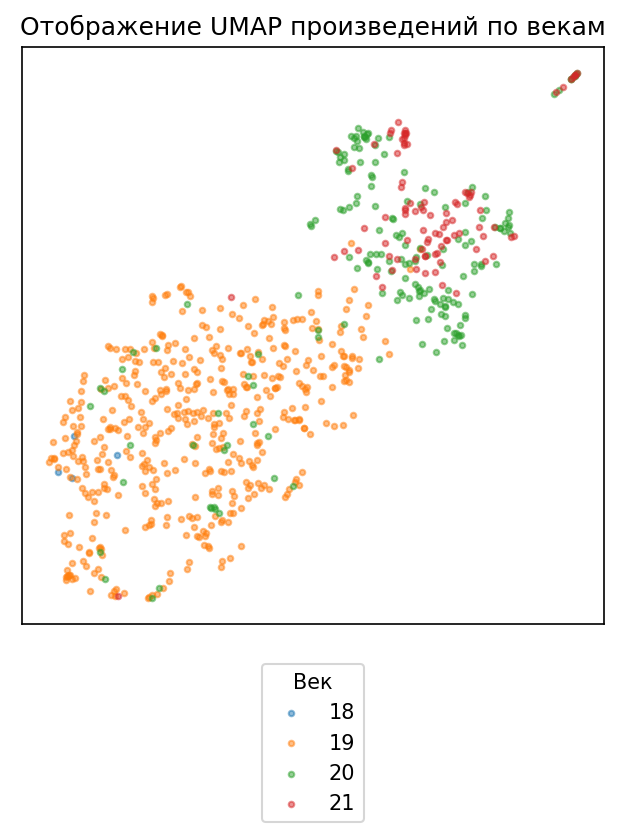

In [28]:
plot_by_keys(cent_tf, mapper, figsize=(5, 5), dpi=150, title='Отображение UMAP произведений по векам', legend_title='Век')

In [29]:
plot_interactive(cent_tf, mapper)

Corpus processing...


100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Найдем самые популярные слова для 18-19 20-21 веков и вычислим разности:

In [30]:
vec1819 = list(cent_tf[18].values()) + list(cent_tf[19].values())
vec2021 = list(cent_tf[20].values()) + list(cent_tf[21].values())

In [31]:
vec1819_mean = vmean(vec1819)
vec1819_mean.get_principal_words()[:100]

array(['свой', 'сказать', 'говорить', 'то', 'который', 'человек', 'знать',
       'один', 'мой', 'рука', 'мочь', 'дело', 'глаз', 'время', 'стать',
       'хотеть', 'ты', 'день', 'слово', 'очень', 'какой', 'лицо',
       'видеть', 'голова', 'другой', 'дом', 'сам', 'думать', 'год',
       'такой', 'ваш', 'тот', 'жизнь', 'весь', 'наш', 'отвечать',
       'спросить', 'быть', 'бог', 'друг', 'казаться', 'отец', 'первый',
       'идти', 'любить', 'несколько', 'дать', 'молодой', 'самый',
       'должный', 'сердце', 'место', 'смотреть', 'душа', 'голос', 'жить',
       'князь', 'сделать', 'комната', 'взять', 'иванович', 'мы', 'минута',
       'пойти', 'иметь', 'делать', 'сторона', 'выйти', 'нибудь', 'сидеть',
       'этот', 'мать', 'женщина', 'твой', 'стоять', 'новый', 'кто',
       'хороший', 'дверь', 'ребёнок', 'два', 'жена', 'брат', 'мысль',
       'продолжать', 'всякий', 'нога', 'последний', 'начать', 'деньга',
       'час', 'заметить', 'любовь', 'господин', 'старик', 'сила', 'по',
       'и

In [32]:
vec2021_mean = vmean(vec2021)
vec2021_mean.get_principal_words()[:100]

array(['сказать', 'свой', 'то', 'человек', 'рука', 'знать', 'который',
       'один', 'говорить', 'стать', 'мочь', 'глаз', 'время', 'год',
       'голова', 'дело', 'день', 'лицо', 'мой', 'жизнь', 'хотеть', 'идти',
       'сам', 'какой', 'видеть', 'очень', 'наш', 'ты', 'тот', 'слово',
       'другой', 'первый', 'дом', 'спросить', 'думать', 'такой', 'друг',
       'быть', 'нога', 'весь', 'место', 'самый', 'смотреть', 'казаться',
       'дверь', 'сидеть', 'несколько', 'мы', 'жить', 'голос', 'сторона',
       'стоять', 'должный', 'новый', 'два', 'понять', 'просто', 'взять',
       'кто', 'сделать', 'пойти', 'земля', 'дать', 'делать', 'чёрный',
       'выйти', 'по', 'увидеть', 'отец', 'ваш', 'конец', 'ответить',
       'стол', 'понимать', 'этот', 'пока', 'последний', 'свет', 'женщина',
       'маленький', 'остаться', 'из', 'окно', 'вода', 'мир', 'дорога',
       'сразу', 'комната', 'минута', 'белый', 'сила', 'ночь', 'хороший',
       'иметь', 'город', 'вид', 'русский', 'ребёнок', 'прийти', 

In [33]:
vdif(vec2021_mean, vec1819_mean).get_principal_words()[:100]

array(['сразу', 'просто', 'год', 'машина', 'понять', 'чёрный', 'пока',
       'ответить', 'оказаться', 'палец', 'лишь', 'нога', 'война', 'мир',
       'конец', 'далёкий', 'стать', 'белый', 'идти', 'второй', 'земля',
       'из', 'вернуться', 'работать', 'рядом', 'фандорин', 'спина',
       'вода', 'словно', 'тело', 'увидеть', 'красный', 'вокруг', 'дверь',
       'пытаться', 'плечо', 'любой', 'стена', 'ранний', 'рот', 'вроде',
       'советский', 'эраст', 'жизнь', 'работа', 'вообще', 'ладонь',
       'страна', 'ждать', 'именно', 'лежать', 'смысл', 'смочь', 'ночь',
       'стол', 'решить', 'обратно', 'окно', 'момент', 'пол', 'ветер',
       'губа', 'огромный', 'появиться', 'снег', 'за', 'похожий', 'среди',
       'понимать', 'левый', 'два', 'мама', 'прийтись', 'значит',
       'телефон', 'улица', 'по', 'уходить', 'подумать', 'профессор',
       'поэтому', 'вниз', 'газета', 'солнце', 'давать', 'коридор', 'небо',
       'снова', 'революция', 'нужный', 'стекло', 'мас', 'поезд', 'возле',
   

In [34]:
vdif(vec1819_mean, vec2021_mean).get_principal_words()[:100]

array(['свой', 'говорить', 'мой', 'отвечать', 'иванович', 'который',
       'князь', 'бог', 'ваш', 'любить', 'молодой', 'сердце', 'отец',
       'слово', 'ты', 'душа', 'дело', 'добрый', 'дочь', 'знать', 'брат',
       'иван', 'граф', 'продолжать', 'твой', 'любовь', 'батюшка',
       'княгиня', 'пётр', 'матушка', 'марья', 'старик', 'она', 'муж',
       'комната', 'нибудь', 'мать', 'слеза', 'проговорить', 'бедный',
       'другой', 'петербург', 'иметь', 'анна', 'очень', 'минута', 'жена',
       'хотеть', 'один', 'тотчас', 'чувство', 'дать', 'ах', 'барин',
       'господин', 'павлович', 'весь', 'графиня', 'деньга', 'прибавить',
       'всякий', 'желать', 'заметить', 'казаться', 'просить', 'взглянуть',
       'сын', 'дом', 'целый', 'какой', 'начать', 'сделаться', 'прежде',
       'решиться', 'катерина', 'изволить', 'довольно', 'право', 'видеть',
       'скоро', 'мочь', 'надобный', 'государь', 'подать', 'княжна',
       'николаевич', 'несколько', 'царь', 'думать', 'пред', 'обед',
       'пр

# One Hot

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
oh = CountVectorizer()

In [36]:
author_oh = corp.vectorize(oh)

Vectorizer fitting...
Done!
Vectorizing...


100%|████████████████████████████████████████████████████████████████████████████████| 180/180 [02:33<00:00,  1.17it/s]

Done!


In [37]:
cent_oh = Corpus(corpus={18 : {}, 19 : {}, 20 : {}, 21 : {}})
for key in corp.keys():
    for subkey in author_oh[key].keys():
        year = int(subkey.split('.')[-1])
        cent_oh[cent(year)][subkey] = author_oh[key][subkey]

In [38]:
model_fit(cent_oh, mapper)

Loading data...


100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 7760.04it/s]

Done!
Model fitting...


Done!


Corpus processing...


100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4252.78it/s]
4it [00:00, 269.99it/s]

Done!


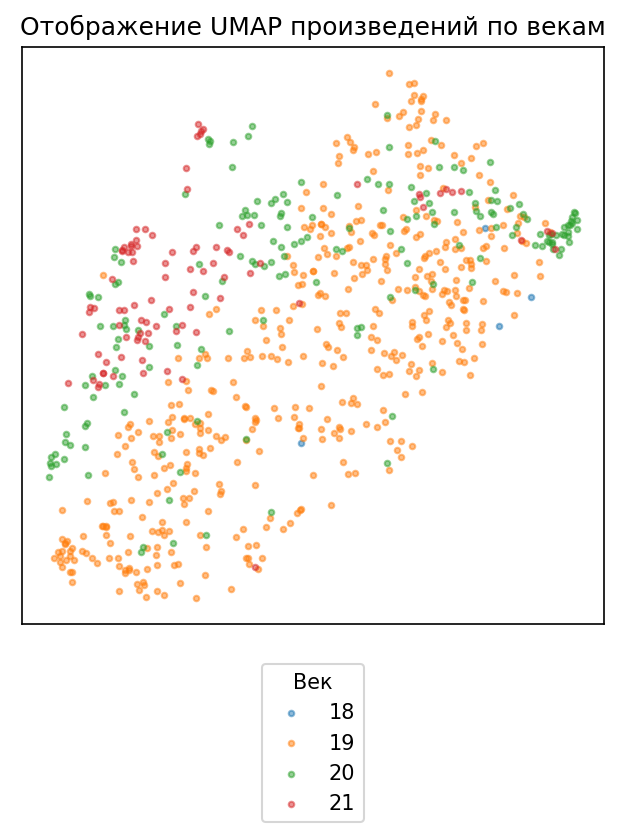

In [40]:
plot_by_keys(cent_oh, mapper, figsize=(5, 5), dpi=150, title='Отображение UMAP произведений по векам', legend_title='Век')

In [41]:
plot_interactive(cent_oh, mapper)

Corpus processing...


100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 7660.83it/s]


In [47]:
vec1819 = list(cent_oh[18].values()) + list(cent_oh[19].values())
vec2021 = list(cent_oh[20].values()) + list(cent_oh[21].values())

In [48]:
vec1819_mean = vmean(vec1819)
vec1819_mean.get_principal_words()[:100]

array(['свой', 'сказать', 'говорить', 'то', 'человек', 'который', 'знать',
       'один', 'рука', 'мой', 'мочь', 'дело', 'время', 'глаз', 'стать',
       'хотеть', 'ты', 'день', 'слово', 'очень', 'лицо', 'какой',
       'видеть', 'другой', 'голова', 'дом', 'сам', 'думать', 'ваш',
       'спросить', 'такой', 'тот', 'весь', 'год', 'отвечать', 'быть',
       'жизнь', 'наш', 'князь', 'бог', 'друг', 'отец', 'первый',
       'несколько', 'казаться', 'идти', 'любить', 'дать', 'самый',
       'должный', 'молодой', 'место', 'сделать', 'голос', 'смотреть',
       'жить', 'комната', 'иванович', 'взять', 'пойти', 'минута',
       'сердце', 'иметь', 'делать', 'мы', 'душа', 'выйти', 'этот',
       'нибудь', 'сторона', 'мать', 'женщина', 'сидеть', 'твой', 'новый',
       'кто', 'стоять', 'дверь', 'хороший', 'два', 'продолжать',
       'последний', 'брат', 'ребёнок', 'деньга', 'жена', 'мысль',
       'всякий', 'начать', 'господин', 'заметить', 'час', 'сила', 'нога',
       'старик', 'по', 'прийти', 'п

In [49]:
vec2021_mean = vmean(vec2021)
vec2021_mean.get_principal_words()[:100]

array(['сказать', 'свой', 'то', 'человек', 'рука', 'знать', 'который',
       'один', 'говорить', 'стать', 'мочь', 'год', 'время', 'глаз',
       'день', 'дело', 'голова', 'сам', 'лицо', 'жизнь', 'идти', 'хотеть',
       'какой', 'наш', 'мой', 'видеть', 'очень', 'первый', 'другой',
       'тот', 'ты', 'слово', 'такой', 'друг', 'весь', 'дом', 'спросить',
       'думать', 'быть', 'самый', 'место', 'мы', 'новый', 'казаться',
       'смотреть', 'нога', 'сидеть', 'должный', 'кто', 'несколько',
       'сторона', 'просто', 'стоять', 'понять', 'два', 'дверь', 'жить',
       'голос', 'взять', 'дать', 'сделать', 'пойти', 'делать', 'по',
       'понимать', 'земля', 'этот', 'русский', 'чёрный', 'конец',
       'увидеть', 'пока', 'ваш', 'последний', 'выйти', 'ответить', 'стол',
       'сразу', 'сила', 'мир', 'остаться', 'маленький', 'из', 'вода',
       'отец', 'иметь', 'хороший', 'свет', 'женщина', 'окно', 'белый',
       'город', 'вид', 'ребёнок', 'война', 'минута', 'давать', 'комната',
       'ж

In [50]:
vdif(vec2021_mean, vec1819_mean).get_principal_words()[:100]

array(['год', 'стать', 'просто', 'человек', 'сразу', 'то', 'война',
       'идти', 'понять', 'рука', 'пока', 'чёрный', 'мир', 'жизнь',
       'оказаться', 'конец', 'нога', 'наш', 'лишь', 'время', 'палец',
       'далёкий', 'ответить', 'белый', 'первый', 'земля', 'машина',
       'вода', 'из', 'второй', 'красный', 'увидеть', 'словно', 'глаз',
       'день', 'новый', 'голова', 'сам', 'россия', 'рядом', 'русский',
       'мочь', 'два', 'работать', 'работа', 'стена', 'советский', 'кто',
       'дверь', 'вернуться', 'спина', 'плечо', 'ждать', 'правительство',
       'понимать', 'вообще', 'стоять', 'тело', 'вокруг', 'сидеть',
       'революция', 'фандорин', 'мы', 'страна', 'по', 'давать', 'сказать',
       'ранний', 'именно', 'пытаться', 'стол', 'армия', 'окно', 'обратно',
       'вроде', 'место', 'любой', 'власть', 'один', 'военный', 'солдат',
       'лежать', 'эраст', 'сторона', 'маленький', 'товарищ', 'рот',
       'друг', 'левый', 'значит', 'тот', 'решить', 'самый', 'генерал',
       'мо

In [51]:
vdif(vec1819_mean, vec2021_mean).get_principal_words()[:100]

array(['отвечать', 'говорить', 'свой', 'князь', 'мой', 'иванович', 'бог',
       'ваш', 'любить', 'граф', 'марья', 'княгиня', 'отец', 'проговорить',
       'продолжать', 'молодой', 'павлович', 'дочь', 'добрый', 'батюшка',
       'сердце', 'анна', 'матушка', 'муж', 'брат', 'тотчас', 'мать',
       'пётр', 'прибавить', 'петербург', 'ппп', 'старик', 'барин',
       'графиня', 'любовь', 'слеза', 'ах', 'катерина', 'взглянуть',
       'воскликнуть', 'желать', 'бедный', 'твой', 'комната', 'княжна',
       'деньга', 'алексей', 'изволить', 'душа', 'пред', 'она',
       'сделаться', 'надобный', 'обратиться', 'коли', 'сын', 'минута',
       'решиться', 'прежде', 'милость', 'подать', 'боярин', 'нибудь',
       'жена', 'обед', 'чувство', 'барыня', 'софья', 'ты', 'наташа',
       'заметить', 'глафира', 'явиться', 'рубль', 'иван', 'господин',
       'василий', 'любезный', 'николаевич', 'броситься', 'фёдорович',
       'гость', 'довольно', 'братец', 'возвратиться', 'который', 'слово',
       'целый', 

Построим интерактивный график и рассмотрим отдельных авторов

Corpus processing...


100%|████████████████████████████████████████████████████████████████████████████████████████| 180/180 [00:00<?, ?it/s]


Done!
Target values processing...


6it [00:00, 42.99it/s]


Done!


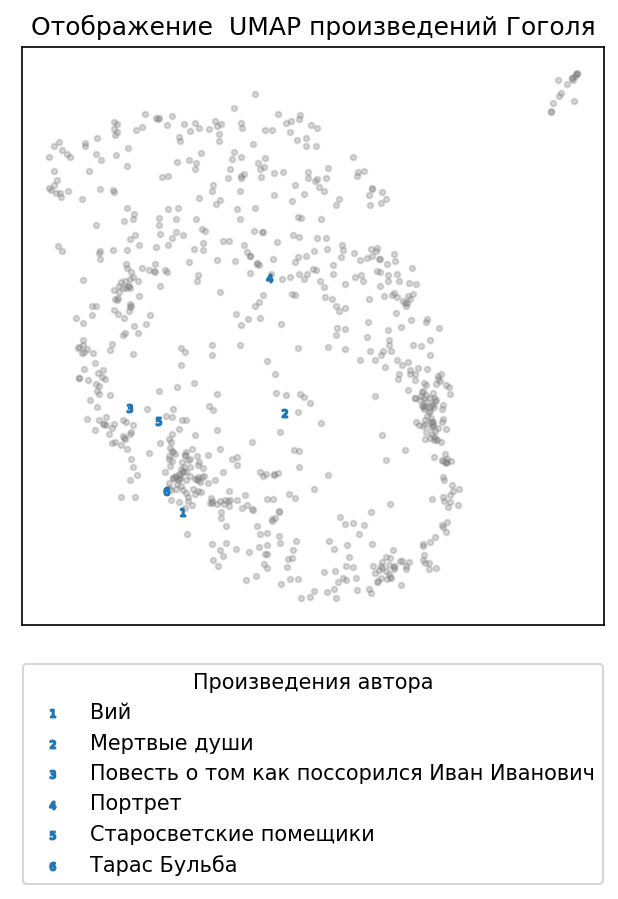

In [19]:
plot_by_subkeys(author_tfidf, 'Гоголь', mapper, figsize=(5, 5), dpi=150, point_size=14, title='Отображение  UMAP произведений Гоголя', legend_title='Произведения автора')

Corpus processing...


100%|████████████████████████████████████████████████████████████████████████████████████████| 180/180 [00:00<?, ?it/s]


Done!
Target values processing...


25it [00:00, 271.72it/s]


Done!


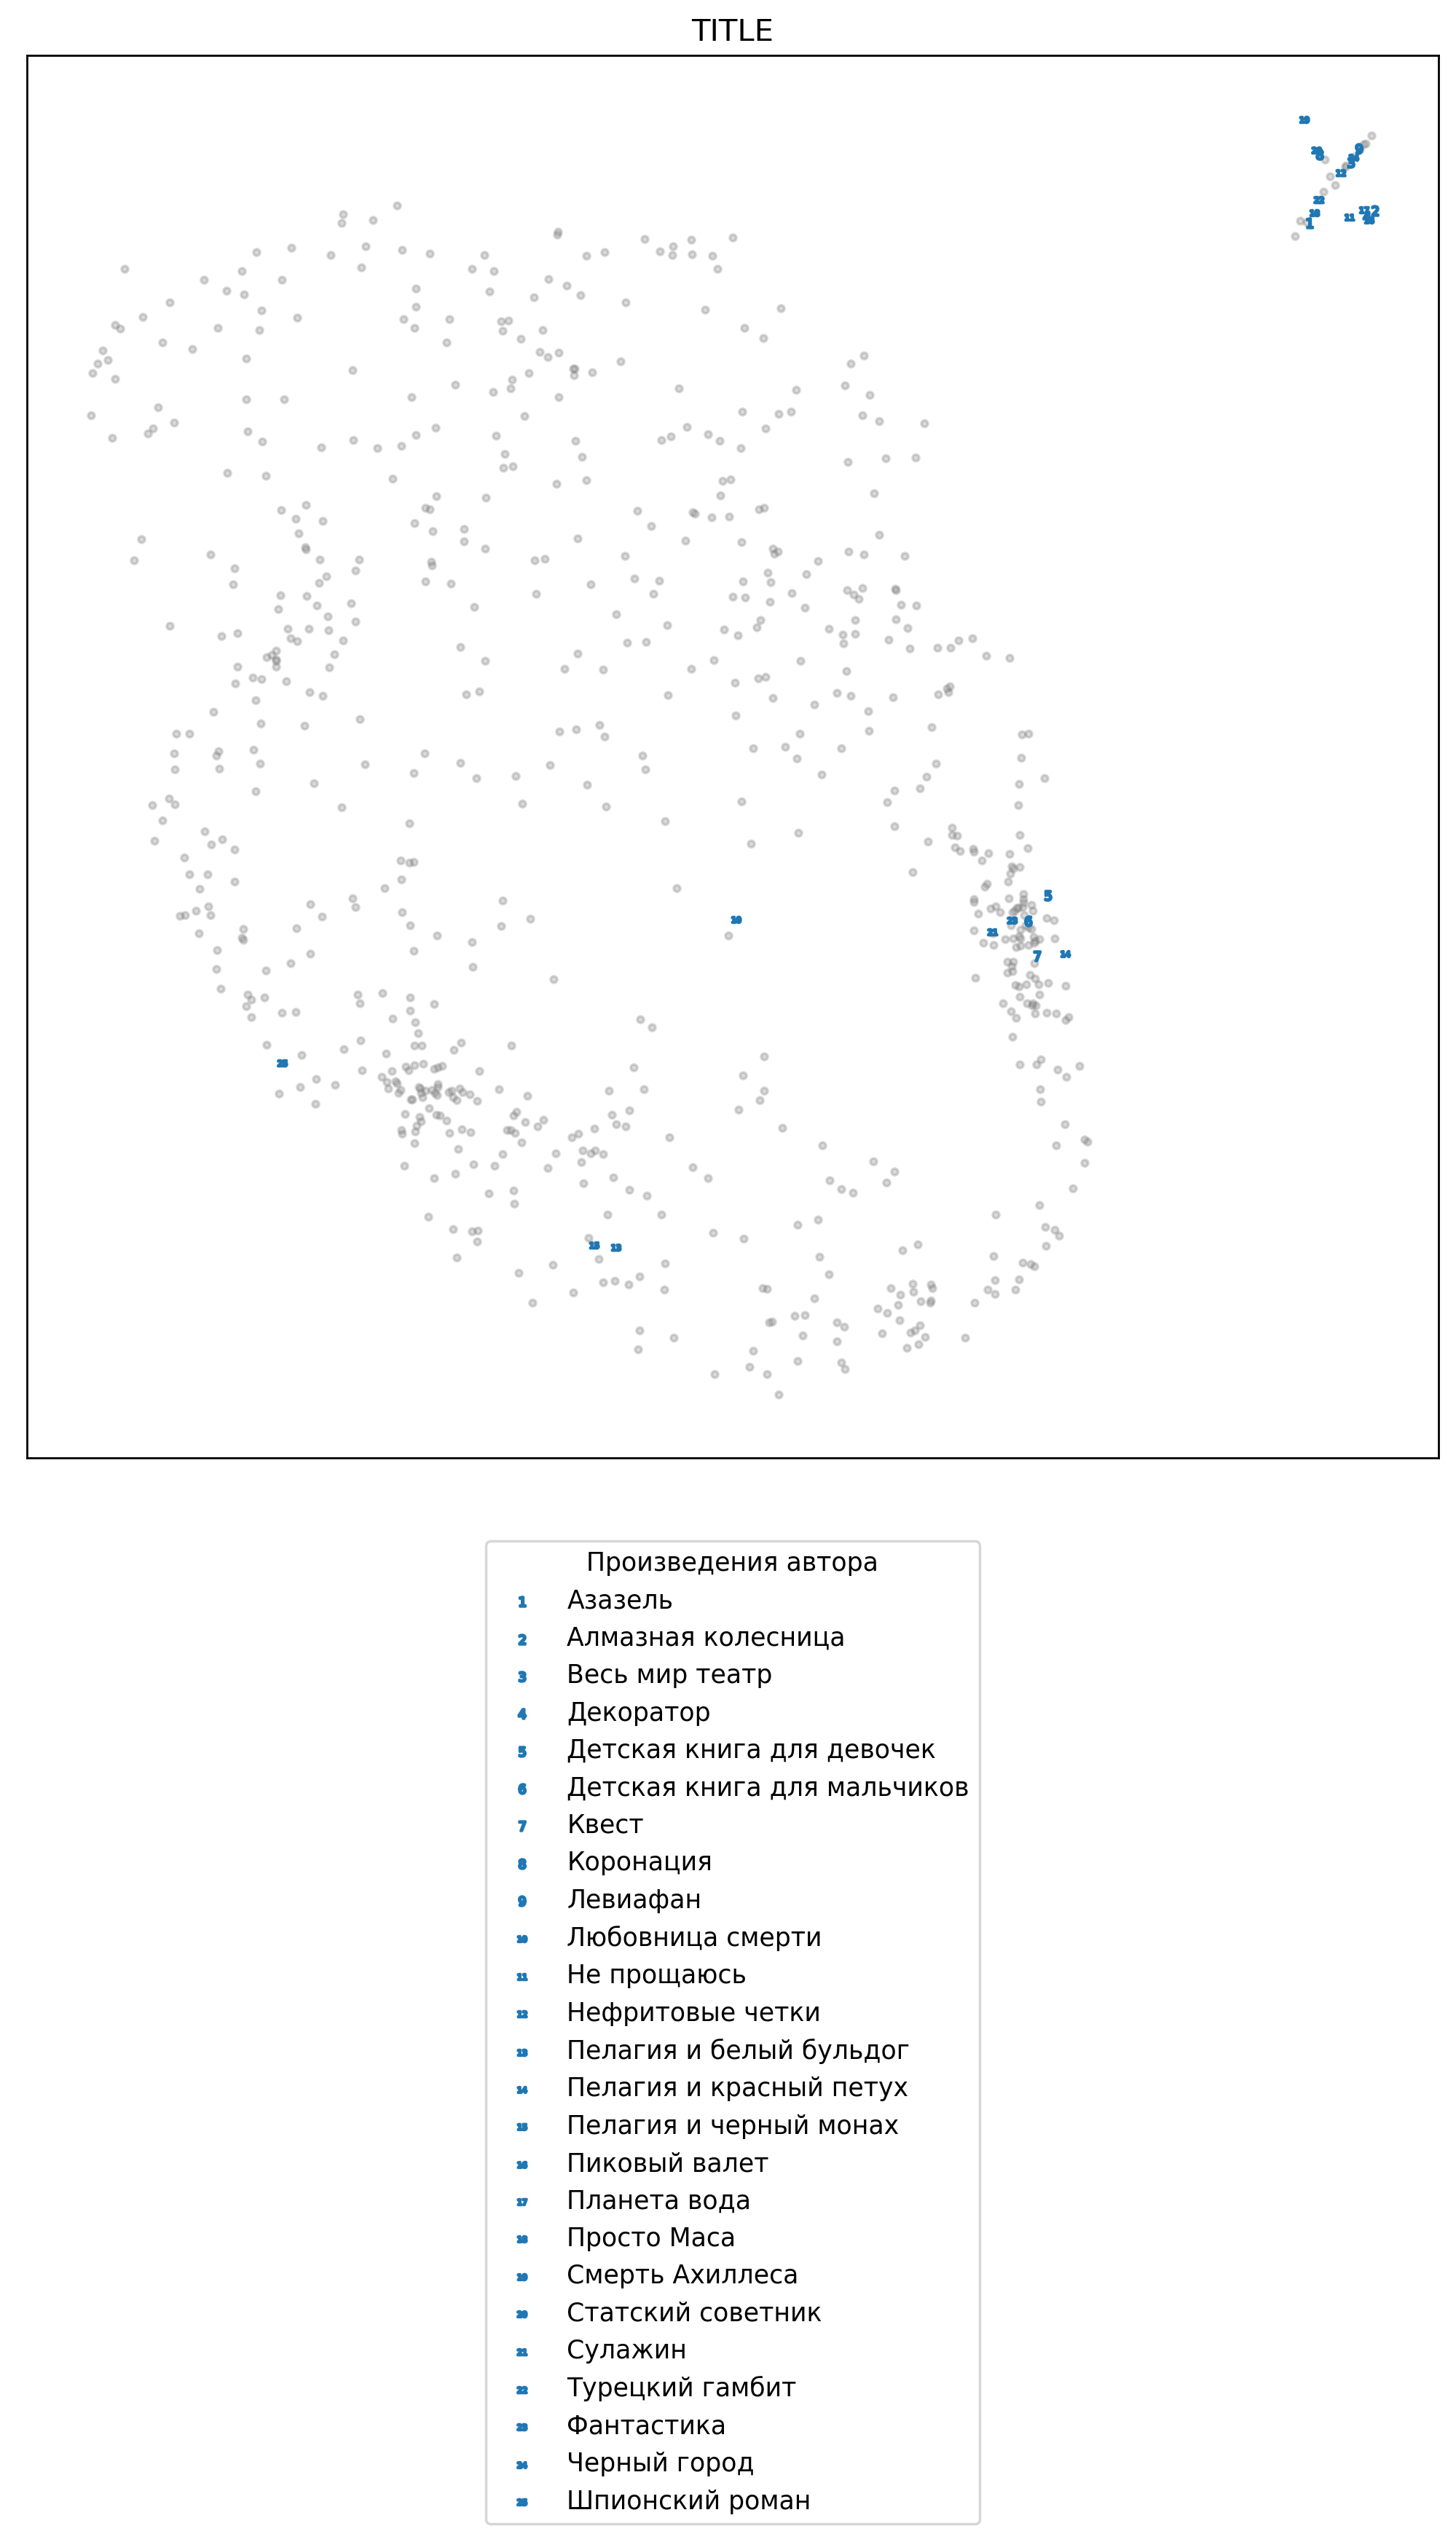

In [20]:
plot_by_subkeys(author_tfidf, 'Акунин', mapper, figsize=(10, 10), dpi=250, point_size=14, legend_title='Произведения автора')